In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
dataset = pd.read_csv("household_power_consumption.txt",delimiter=';',low_memory=False)
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
dataset.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2075258,26/11/2010,21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [8]:
dataset.shape

(2075259, 9)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [10]:
dataset.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [11]:
columns_names=dataset.columns


In [12]:
percentage_missing=dataset.isnull().sum()*100/len(dataset)
missing_values_df=pd.DataFrame({'precentage_missing':percentage_missing})

In [13]:
missing_values_df

,precentage_missing
Date,0.000000
Time,0.000000
Global_active_power,0.000000
Global_reactive_power,0.000000
Voltage,0.000000
Global_intensity,0.000000
Sub_metering_1,0.000000
Sub_metering_2,0.000000
Sub_metering_3,1.251844


In [14]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN


In [15]:
dataset.replace('?',np.nan,inplace=True)

In [16]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dataset=dataset.dropna(how='all')

In [18]:
# Converting Date column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d/%m/%Y')

# Extracting year and month from Date
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month

In [19]:
dataset.drop(columns=['Date', 'Time'], inplace=True)

In [20]:
for i in dataset.columns:
    dataset[i] = dataset[i].astype('float64')

In [21]:
dataset.shape

(2075259, 9)

In [22]:
values=dataset.values
dataset['Sub_metering_4']=(values[:,0]*1000/60)-(values[:,4]+values[:,5]+values[:,6])

In [23]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Sub_metering_4
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006.0,12.0,52.266667
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006.0,12.0,72.333333
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006.0,12.0,70.566667
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006.0,12.0,71.800000
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006.0,12.0,43.100000


In [24]:
dataset.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Year                         0
Month                        0
Sub_metering_4           25979
dtype: int64

In [25]:
dataset.duplicated().sum()

89329

In [26]:
dataset = dataset.drop_duplicates()

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
encoded= imputer.fit_transform(dataset)

In [28]:
dataset.duplicated().sum()

0

In [29]:
columns_names=dataset.columns

In [30]:
dataset=pd.DataFrame(encoded,columns=columns_names)

In [31]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Sub_metering_4
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006.0,12.0,52.266667
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006.0,12.0,72.333333
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006.0,12.0,70.566667
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006.0,12.0,71.800000
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006.0,12.0,43.100000
...,...,...,...,...,...,...,...,...,...,...
1985925,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010.0,11.0,15.766667
1985926,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010.0,11.0,15.733333
1985927,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010.0,11.0,15.633333
1985928,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010.0,11.0,15.566667


In [32]:
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Year                     0
Month                    0
Sub_metering_4           0
dtype: int64

In [33]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Sub_metering_4
count,1.985930e+06,1.985930e+06,1.985930e+06,1.985930e+06,1.985930e+06,1.985930e+06,1.985930e+06,1.985930e+06,1.985930e+06,1.985930e+06
mean,1.118126e+00,1.268873e-01,2.408220e+02,4.741189e+00,1.157523e+00,1.338725e+00,6.624555e+00,2.008435e+03,6.447504e+00,9.514623e+00
std,1.061942e+00,1.126801e-01,3.256315e+00,4.462433e+00,6.246674e+00,5.909181e+00,8.490741e+00,1.125905e+00,3.437789e+00,9.656052e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.006000e+03,1.000000e+00,-2.400000e+00
25%,3.180000e-01,5.200000e-02,2.389500e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.007000e+03,3.000000e+00,3.933333e+00
50%,6.640000e-01,1.020000e-01,2.409900e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.008000e+03,6.000000e+00,5.633333e+00
75%,1.548000e+00,1.980000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.800000e+01,2.009000e+03,9.000000e+00,1.070000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2.010000e+03,1.200000e+01,1.248333e+02


In [34]:
#  DATA VISUALIZATION

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Global_active_power', ylabel='Count'>

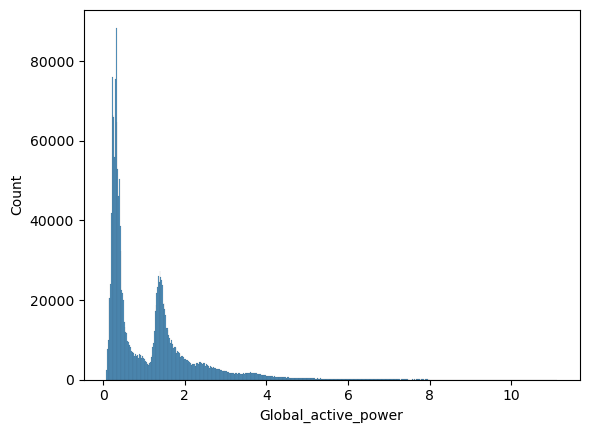

In [35]:
sns.histplot(dataset['Global_active_power'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Global_active_power', ylabel='Count'>

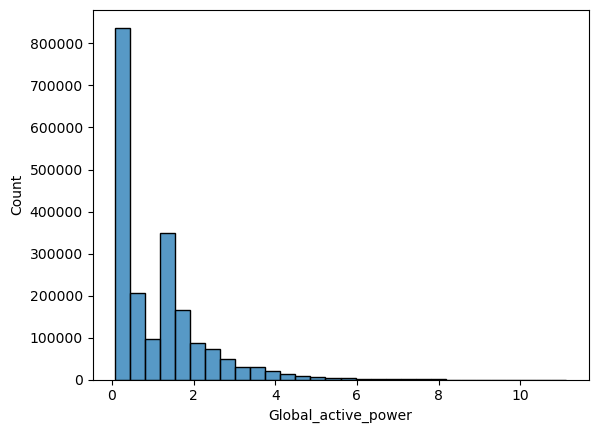

In [36]:
sns.histplot(dataset['Global_active_power'],kde=False,bins=30)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Global_reactive_power', ylabel='Count'>

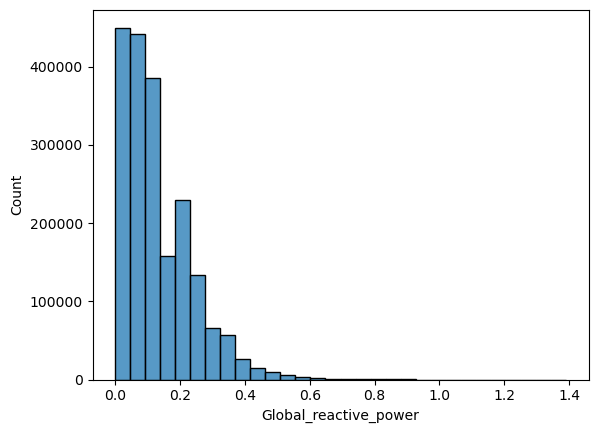

In [37]:
sns.histplot(dataset['Global_reactive_power'],kde=False,bins=30)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Voltage', ylabel='Count'>

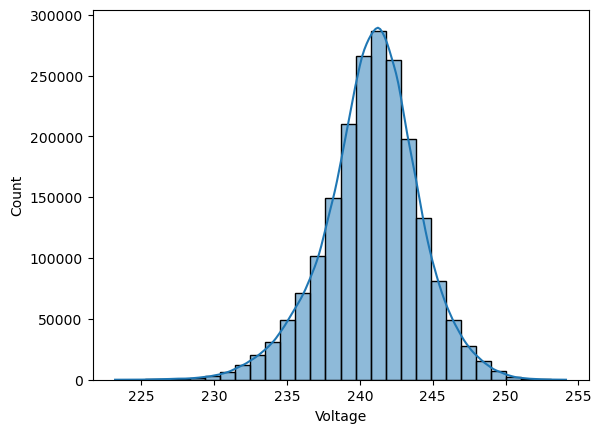

In [38]:
sns.histplot(dataset['Voltage'],kde=True,bins=30)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Global_intensity', ylabel='Count'>

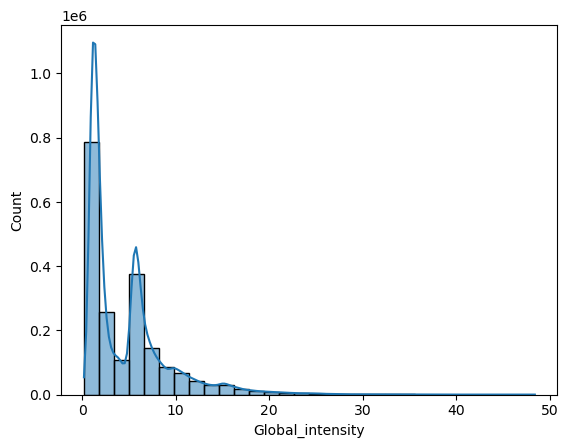

In [39]:
sns.histplot(dataset['Global_intensity'],kde=True,bins=30)

In [40]:
#  CORRELATION OF DATA ANALYSIS
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Sub_metering_4
Global_active_power,1.000000,0.230503,-0.404192,0.998874,0.485518,0.434313,0.632714,-0.043382,-0.030718,0.696716
Global_reactive_power,0.230503,1.000000,-0.109372,0.249645,0.119967,0.135212,0.073848,0.039692,0.028814,0.197211
Voltage,-0.404192,-0.109372,1.000000,-0.416054,-0.197169,-0.168087,-0.269240,0.255660,-0.013706,-0.273700
Global_intensity,0.998874,0.249645,-0.416054,1.000000,0.490557,0.440207,0.620457,-0.047872,-0.029450,0.698563
Sub_metering_1,0.485518,0.119967,-0.197169,0.490557,1.000000,0.053546,0.099961,-0.014455,-0.007247,0.122346
Sub_metering_2,0.434313,0.135212,-0.168087,0.440207,0.053546,1.000000,0.077384,-0.038560,-0.009433,0.081422
Sub_metering_3,0.632714,0.073848,-0.269240,0.620457,0.099961,0.077384,1.000000,0.056164,-0.029813,0.168390
Year,-0.043382,0.039692,0.255660,-0.047872,-0.014455,-0.038560,0.056164,1.000000,-0.093120,-0.095954
Month,-0.030718,0.028814,-0.013706,-0.029450,-0.007247,-0.009433,-0.029813,-0.093120,1.000000,-0.019629
Sub_metering_4,0.696716,0.197211,-0.273700,0.698563,0.122346,0.081422,0.168390,-0.095954,-0.019629,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


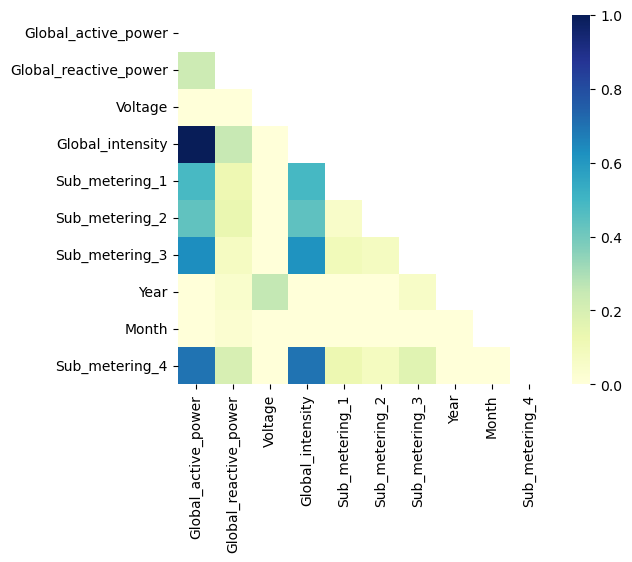

In [41]:
#ANALYSIS OF  HEATMAP

pearson=dataset.corr(method='pearson')
mask=np.zeros_like(pearson)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


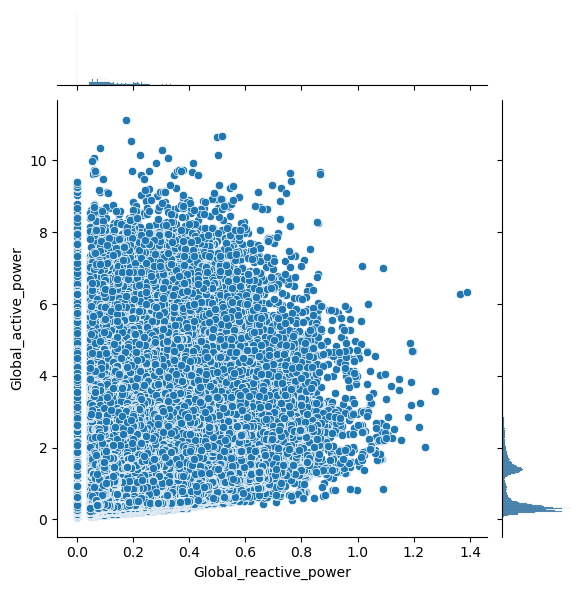

In [42]:
sns.jointplot(x = 'Global_reactive_power', y = 'Global_active_power', data = dataset, kind = 'scatter')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


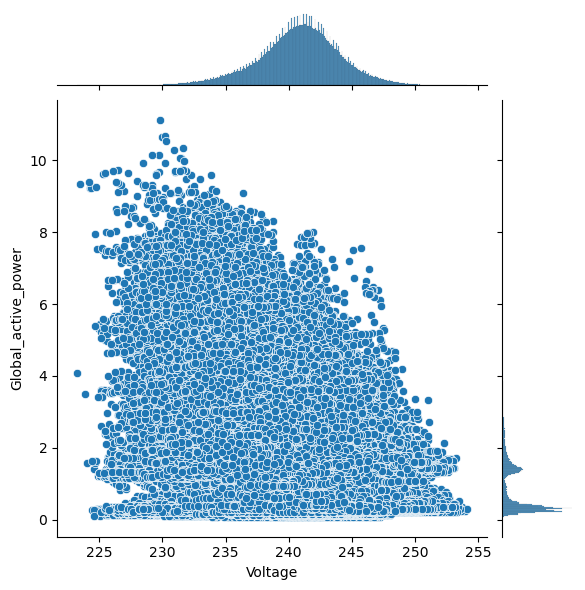

In [43]:
sns.jointplot(x = 'Voltage', y = 'Global_active_power', data = dataset, kind = 'scatter')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


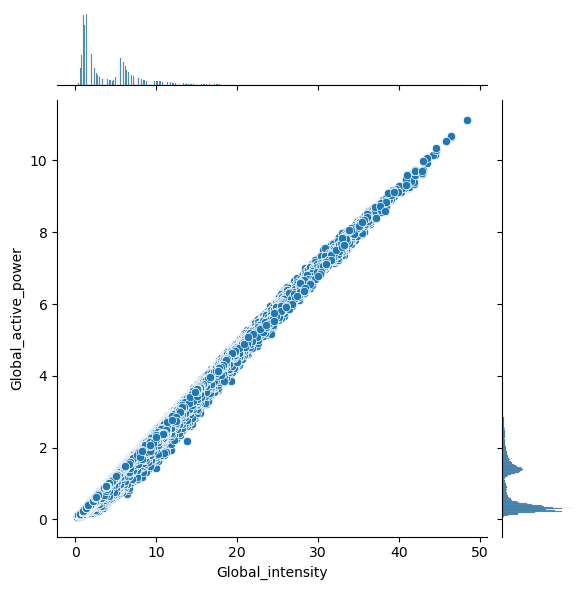

In [44]:
sns.jointplot(x = 'Global_intensity', y = 'Global_active_power', data = dataset, kind = 'scatter')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


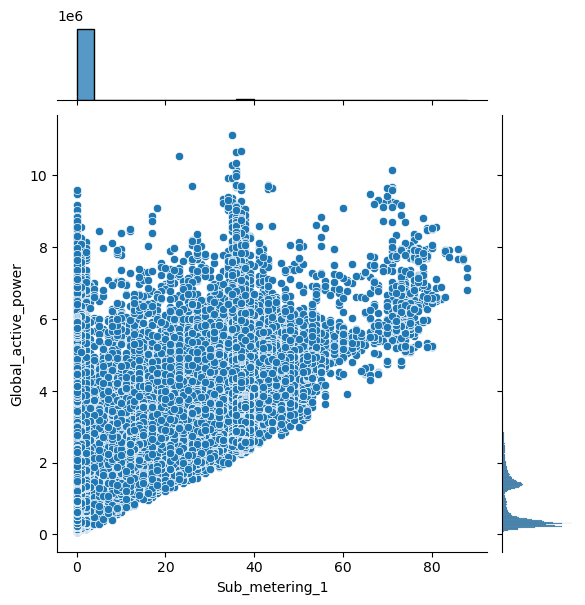

In [45]:
sns.jointplot(x = 'Sub_metering_1', y = 'Global_active_power', data = dataset, kind = 'scatter')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


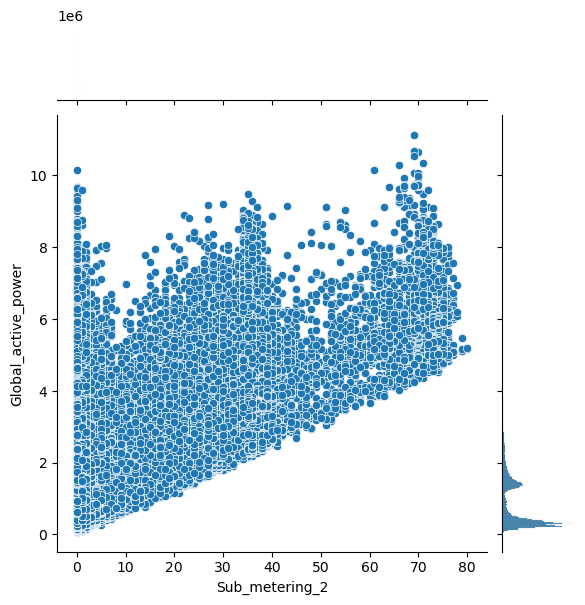

In [46]:
sns.jointplot(x = 'Sub_metering_2', y = 'Global_active_power', data = dataset, kind = 'scatter')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


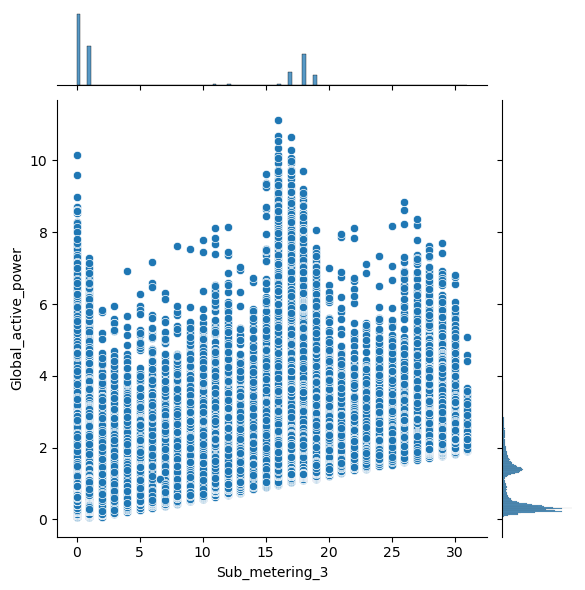

In [47]:
sns.jointplot(x = 'Sub_metering_3', y = 'Global_active_power', data = dataset, kind = 'scatter')

In [48]:
X=dataset.drop('Global_active_power',axis=1)

In [49]:
y = dataset['Global_active_power'] 
y.head()

0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64

In [50]:
X

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Sub_metering_4
0,0.418,234.84,18.4,0.0,1.0,17.0,2006.0,12.0,52.266667
1,0.436,233.63,23.0,0.0,1.0,16.0,2006.0,12.0,72.333333
2,0.498,233.29,23.0,0.0,2.0,17.0,2006.0,12.0,70.566667
3,0.502,233.74,23.0,0.0,1.0,17.0,2006.0,12.0,71.800000
4,0.528,235.68,15.8,0.0,1.0,17.0,2006.0,12.0,43.100000
...,...,...,...,...,...,...,...,...,...
1985925,0.000,240.43,4.0,0.0,0.0,0.0,2010.0,11.0,15.766667
1985926,0.000,240.00,4.0,0.0,0.0,0.0,2010.0,11.0,15.733333
1985927,0.000,239.82,3.8,0.0,0.0,0.0,2010.0,11.0,15.633333
1985928,0.000,239.70,3.8,0.0,0.0,0.0,2010.0,11.0,15.566667


In [51]:
y

0          4.216
1          5.360
2          5.374
3          5.388
4          3.666
           ...  
1985925    0.946
1985926    0.944
1985927    0.938
1985928    0.934
1985929    0.932
Name: Global_active_power, Length: 1985930, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [54]:
# Checking if there are identical rows in X_train and X_test
identical_rows = pd.merge(X_train, X_test, how='inner').shape[0]
print(f"Number of identical rows between X_train and X_test: {identical_rows}")

Number of identical rows between X_train and X_test: 0


In [55]:
dataset.duplicated().sum()

0

In [56]:
X_train.shape

(1390151, 9)

In [57]:
X_test.shape

(595779, 9)

In [58]:
y_train

588065     0.658
803592     0.248
517737     2.846
1741110    0.162
97460      1.754
           ...  
661055     0.350
204614     2.092
1525073    1.342
1263115    1.124
1225567    0.346
Name: Global_active_power, Length: 1390151, dtype: float64

In [59]:
y_test

1883088    0.342
123000     4.526
1431917    0.326
1397104    0.132
97840      1.326
           ...  
1667558    0.308
1433079    0.222
429618     1.234
899207     0.390
295570     0.456
Name: Global_active_power, Length: 595779, dtype: float64

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr=LinearRegression()

In [62]:
lr.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred=lr.predict(X_test)

In [64]:
print(y_pred)

[0.342 4.526 0.326 ... 1.234 0.39  0.456]


In [65]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [66]:
print(score)

1.0


In [67]:
from sklearn import metrics

# Assuming y_test and predictions are already defined (test data and predicted values)

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# Calculate RMSE (Root Mean Squared Error)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R Squares value:', metrics.r2_score(y_test, y_pred))


MAE: 1.582089899332292e-14
MSE: 4.30611493466111e-28
RMSE: 2.0751180531866398e-14
R Squares value: 1.0
